In [39]:
# for data manipulation and analysis
import pandas as pd

# Writing to a CSV File
import csv

# for better display
from IPython.display import display

# for vizualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Numerical computing
import numpy as np
import math

In [40]:
def wrangle(filepath):
    # Load data
    df = pd.read_csv(filepath) 

    # Remove all instances of ' (suspected)' from the Perpetrator_group column
    df['Perpetrator_group'] = df['Perpetrator_group'].str.replace(r'\s*\(suspected\)', '', regex=True)

    # Convert to numeric
    df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
    df['injuried'] = pd.to_numeric(df['injured'], errors='coerce')

    # Put the 'Date' column in datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Create a new column for the month name
    df['Month'] = df['Date'].dt.month_name()

    return df

In [53]:
filepath = r"C:\Users\KINGLEY EYO\Desktop\Data File\gtd_crime_west_africa.csv"
df = wrangle(filepath)

In [54]:
df.head()

,GTID,Date,Country,City,Perpetrator_group,fatalities,injured,target_type,attack_type,weapon_type
0,202012290026,2020-12-29,Nigeria,Kayamla,Boko Haram,9,7,Terrorists/Non-state Militia,Sub-Saharan Africa,Bombing/Explosion
1,202012290025,2020-12-29,Nigeria,Kayamla,Boko Haram,0,0,Terrorists/Non-state Militia,Sub-Saharan Africa,"Bombing/Explosion,Armed Assault"
2,202012290023,2020-12-29,Nigeria,Tungushe,Boko Haram,3,2,"Private Citizens & Property,Military",Sub-Saharan Africa,Armed Assault
3,202012280023,2020-12-28,Nigeria,Logomani,Boko Haram,3,0,Military,Sub-Saharan Africa,Bombing/Explosion
4,202012270025,2020-12-27,Nigeria,Nagu,Unknown,3,Unknown,"Government (General),Private Citizens & Property",Sub-Saharan Africa,"Armed Assault,Facility/Infrastructure Attack"


In [55]:
df.isnull().sum()

GTID                 0
Date                 0
Country              0
City                 0
Perpetrator_group    0
fatalities           0
injured              0
target_type          0
attack_type          0
weapon_type          0
dtype: int64

In [56]:
df['Perpetrator_group'].nunique()


190

In [68]:
df['Perpetrator_group'].unique()

array(['Boko Haram', 'Unknown', 'Fulani extremists',
       'Return, Reclamation, Rehabilitation (3R)', 'Separatists',
       'Islamic State in the Greater Sahara (ISGS)',
       'Fulani extremists,Boko Haram',
       'Indigenous People of Biafra (IPOB)', 'Jukun militia',
       'Reformed Niger Delta Avengers (RNDA)', 'Niger Delta extremists',
       'Ambazonia Restoration Forces (ARF)',
       'Western Togoland Restoration Front (WTRF)', 'Atyap militia',
       "Ansaru (Jama'atu Ansarul Muslimina Fi Biladis Sudan),Fulani extremists",
       'Red Dragons', 'Muslim extremists', 'Tiv Militia',
       'Boko Haram,Fulani extremists',
       'Intelligence Force of Oku,Ambazonia Restoration Forces (ARF)',
       'Islamic State in the Greater Sahara (ISGS),Jamaat Nusrat al-Islam wal Muslimin (JNIM)',
       'Military Command Council for the Salvation of the Republic (CCSMR)',
       "Ansaru (Jama'atu Ansarul Muslimina Fi Biladis Sudan)",
       'Jamaat Nusrat al-Islam wal Muslimin (JNIM)',
  

In [60]:
df.head()

,GTID,Date,Country,City,Perpetrator_group,fatalities,injured,target_type,attack_type,weapon_type,Month
0,202012290026,2020-12-29,Nigeria,Kayamla,Boko Haram,9,7,Terrorists/Non-state Militia,Sub-Saharan Africa,Bombing/Explosion,December
1,202012290025,2020-12-29,Nigeria,Kayamla,Boko Haram,0,0,Terrorists/Non-state Militia,Sub-Saharan Africa,"Bombing/Explosion,Armed Assault",December
2,202012290023,2020-12-29,Nigeria,Tungushe,Boko Haram,3,2,"Private Citizens & Property,Military",Sub-Saharan Africa,Armed Assault,December
3,202012280023,2020-12-28,Nigeria,Logomani,Boko Haram,3,0,Military,Sub-Saharan Africa,Bombing/Explosion,December
4,202012270025,2020-12-27,Nigeria,Nagu,Unknown,3,Unknown,"Government (General),Private Citizens & Property",Sub-Saharan Africa,"Armed Assault,Facility/Infrastructure Attack",December


In [62]:
print(df[['fatalities', 'injured']].dtypes)

fatalities    float64
injured        object
dtype: object


In [63]:
# Check unique non-numeric values
print(df['fatalities'].unique())
print(df['injuried'].unique())


[  9.   0.   3.   1.  nan   2.   5.  11.   6.  18.  10.   4.   7.   8.
  34.  81.  13.  20.  16.  14.  30.  75.  12.  19.  23.  21.  40.  22.
  17.  28.  98. 179.  50.  43.  24.  25. 166.  29.  31.  15. 128.  26.
  33.  70. 101.  39.  60. 118.  56.  83.  35.  48.  38.  37.  32.  58.
  59.  45.  69.  27.  49.  57.  73.  52.  41.  51.  88. 108.  68. 174.
  44.  97.  42.  47. 230.  95.  74. 208.  90. 144. 126. 107. 117. 180.
  61. 122.  65. 201. 100. 151. 200. 315.  71. 212.  96. 106. 142.  46.
  76.  77. 160.  63. 150.  80. 171.]
[7.000e+00 0.000e+00 2.000e+00       nan 1.000e+00 3.000e+00 4.000e+00
 1.000e+02 8.000e+00 6.000e+00 1.600e+01 2.600e+01 5.000e+00 1.100e+01
 1.200e+01 1.400e+01 1.300e+01 9.000e+00 1.000e+01 1.500e+01 2.800e+01
 2.000e+01 2.400e+01 4.100e+01 6.100e+01 4.700e+01 1.700e+01 3.500e+01
 1.900e+01 1.800e+01 2.900e+01 2.100e+01 3.100e+01 2.700e+01 2.300e+01
 4.400e+01 4.800e+01 4.000e+01 4.600e+01 3.000e+01 4.200e+01 1.770e+02
 2.200e+01 6.700e+01 5.600e+01 3.200e+01

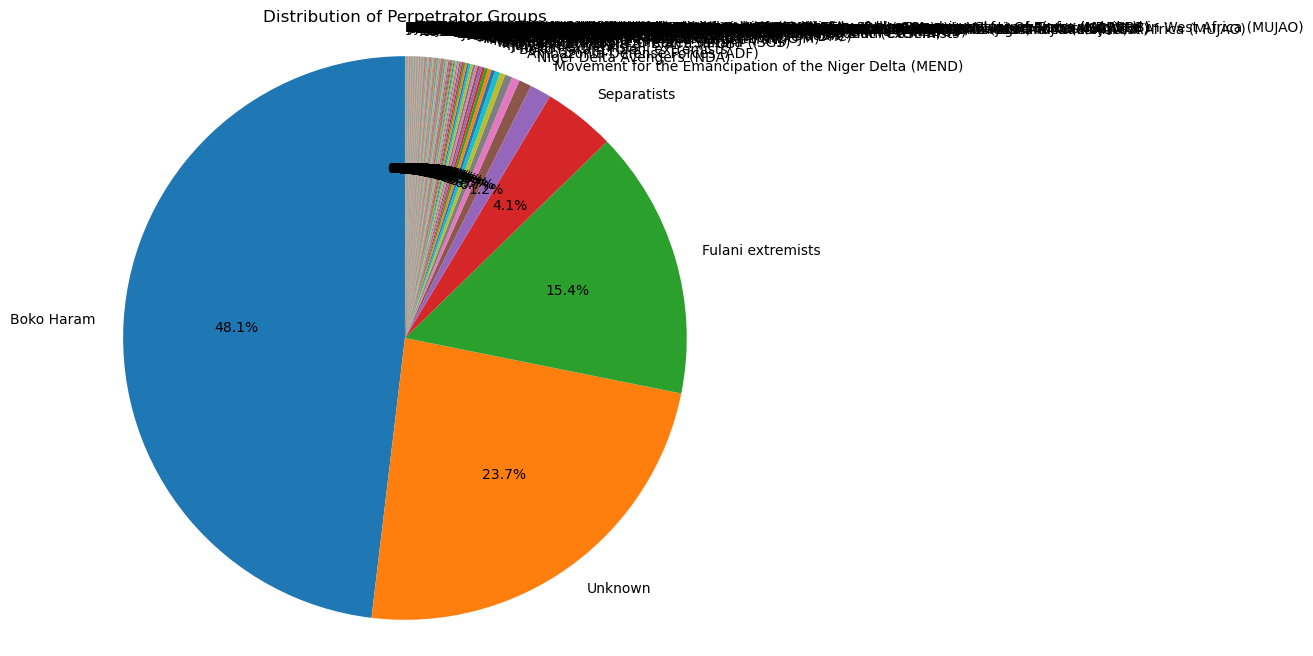

In [65]:
# Count the occurrences of each unique Perpetrator_group
perpetrator_counts = df['Perpetrator_group'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(perpetrator_counts, labels=perpetrator_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Perpetrator Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

In [19]:
df.to_csv("crime_WA", index=True)


In [70]:
df.to_excel(r"C:\Users\KINGLEY EYO\Documents\new_crime_WA.xlsx", index=False)
